# Decide which syllables to keep

- do a 1 percentile threshold over everything
- do a 1 percentile threshold over sliding window, aggregate over it all
- repeat for 5/10% (frames explained)

**choosing 90% frames explained accumulated across 3-age sliding windows**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from toolz import sliding_window
from tqdm.auto import tqdm
from aging.plotting import format_plots, figure

In [2]:
format_plots()

In [3]:
df = pd.concat(
    [
        pd.read_parquet(
            "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_syllable_df_v00.parquet"
        ),
        pd.read_parquet(
            "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_syllable_df_v00.parquet"
        ),
    ]
)

In [4]:
out = df.groupby('experiment', sort=False)['age'].unique()

In [5]:
np.sort(out.iloc[0])

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  78,  80,  84,  90, 103])

In [6]:
np.sort(out.iloc[1])

array([  4,   8,  12,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,
        60,  64,  68,  72,  78,  80,  84,  90, 127])

In [7]:
df = df.query('age < 100')

In [8]:
ages = np.sort(df['age'].unique())

In [9]:
onset_df = df.query('onsets')

In [10]:
rle_counts = onset_df.groupby(['age', 'experiment', 'uuid'])['syllables'].value_counts()
rle_counts = pd.pivot_table(rle_counts.reset_index(), index=['age', 'experiment', 'uuid'], columns='syllables', values='count', fill_value=0).reindex(columns=np.arange(100), fill_value=0)

In [11]:
sorting = rle_counts.quantile(0.9).sort_values(ascending=False).index

In [12]:
# rle_counts = rle_counts[sorting]

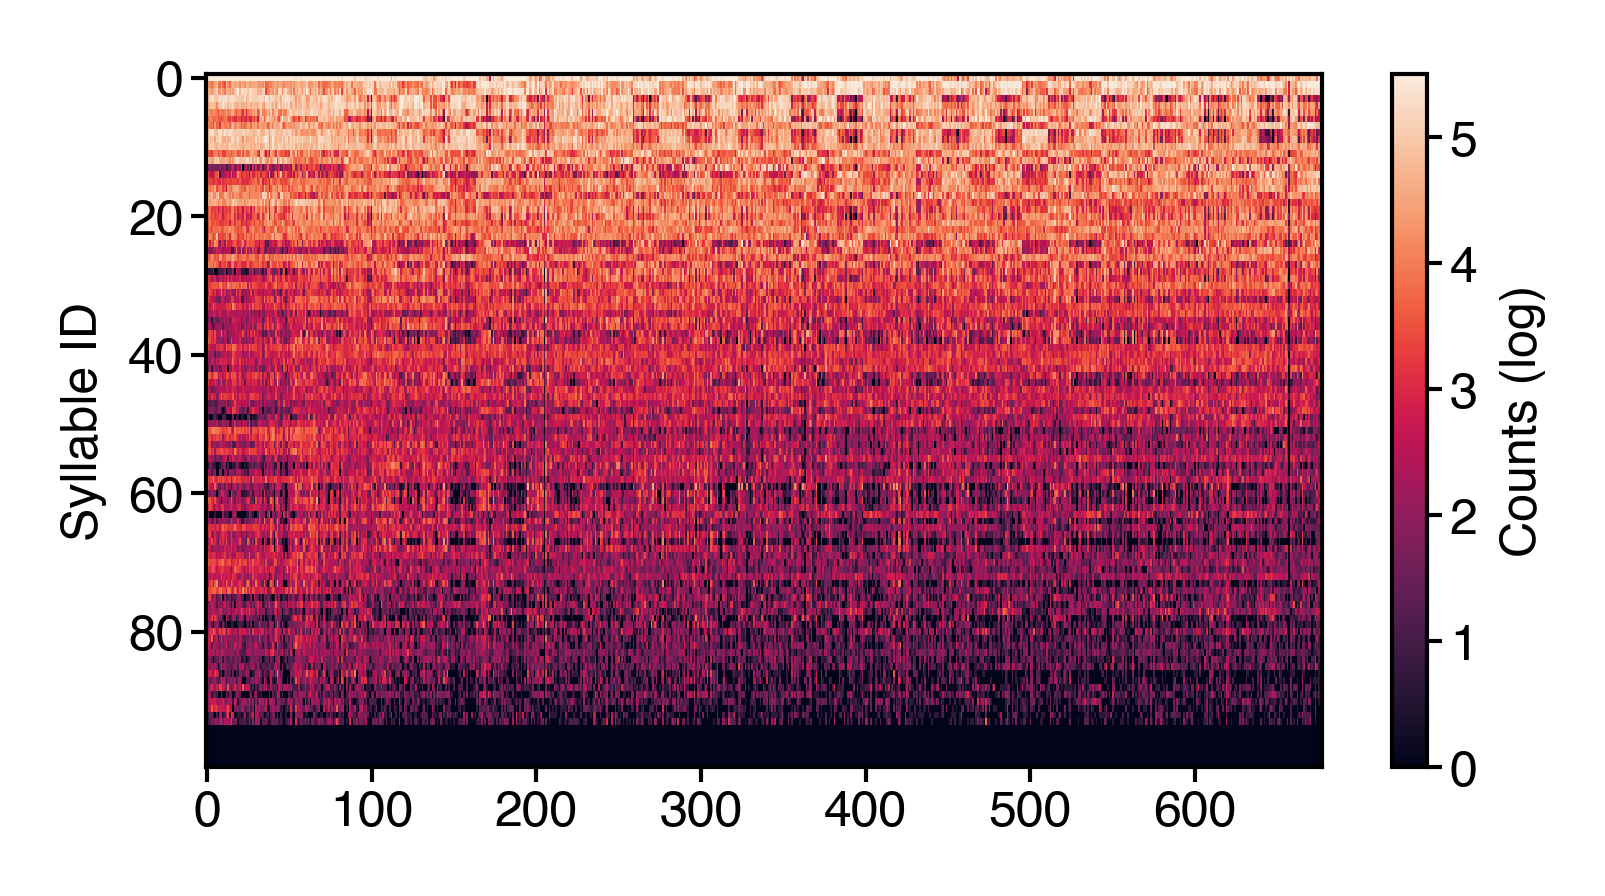

In [13]:
fig = figure(3, 1.5)
plt.imshow(np.log(rle_counts[sorting].T + 1), aspect='auto', interpolation='none', vmax=5.5)
plt.ylabel('Syllable ID')
plt.colorbar(label='Counts (log)')

In [14]:
frame_counts = df.groupby(['age', 'experiment', 'uuid'])['syllables'].value_counts()
frame_counts = pd.pivot_table(frame_counts.reset_index(), index=['age', 'experiment', 'uuid'], columns='syllables', values='count', fill_value=0)

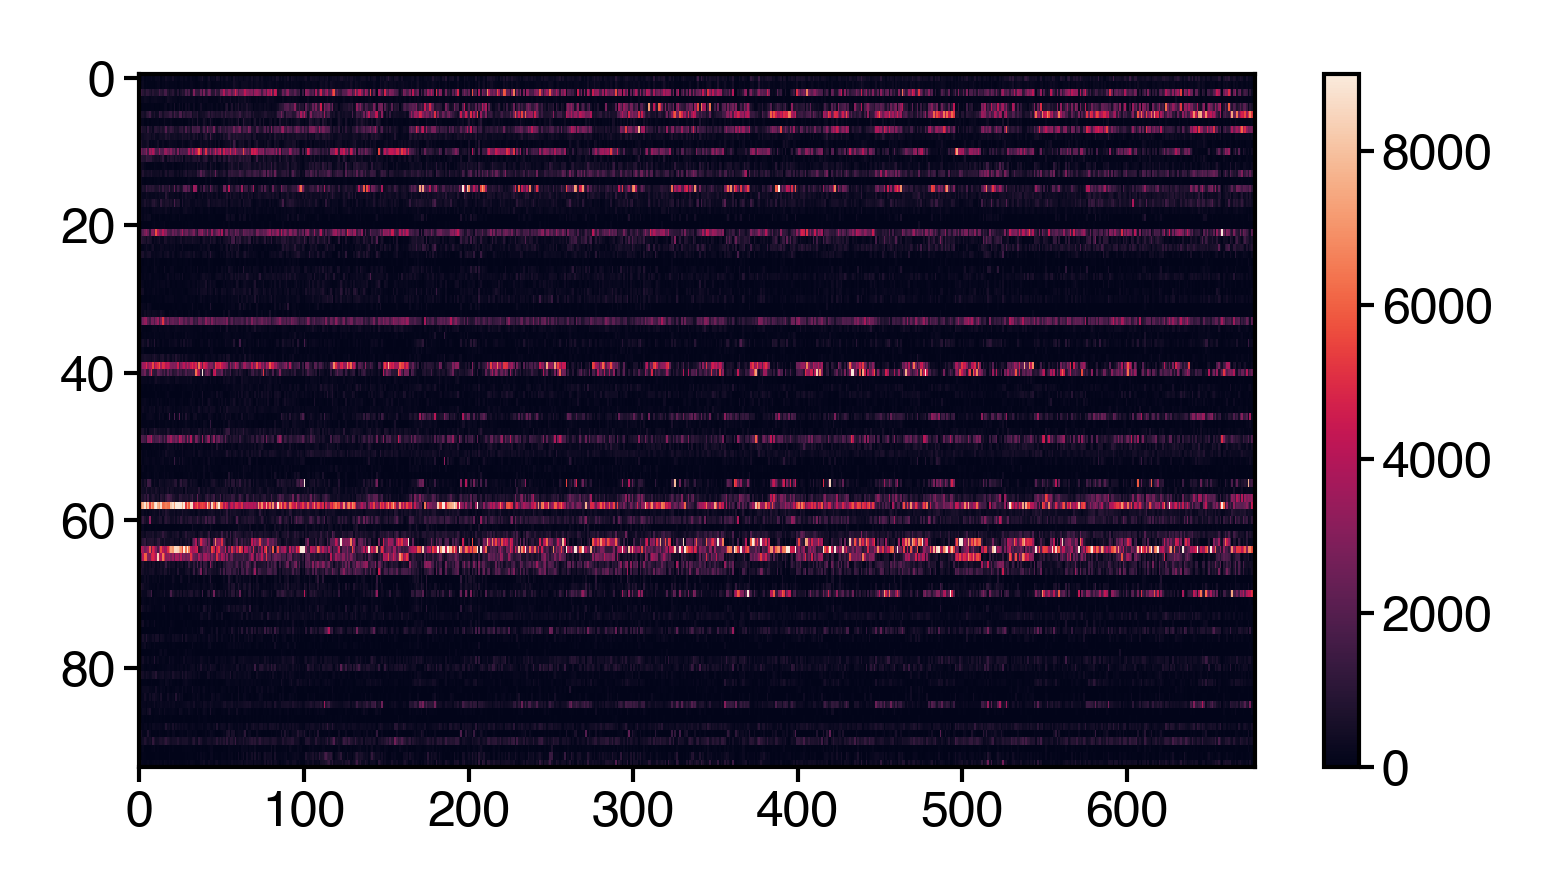

In [15]:
fig = figure(3, 1.5)
plt.imshow(frame_counts.T, aspect='auto', interpolation='none', vmax=9000)
plt.colorbar()

In [63]:
rle_counts.loc[4:12]

syllables                                                    0     1      2   \
age experiment       uuid                                                      
4   ontogeny_females 04aee047-7a05-4b16-9383-4e91881620e8   3.0   3.0   36.0   
                     36f07ef0-48f2-4051-b758-e5d403663fff   3.0  11.0   87.0   
                     5907f016-4a81-400b-ac0a-39edfce74342  13.0  12.0   64.0   
                     5cc69551-c367-49a3-9eeb-ad6dc0c739e2   1.0   7.0   54.0   
                     6369a7c5-4be9-45bb-97b3-1780c8bcec81   9.0  10.0   85.0   
...                                                         ...   ...    ...   
12  ontogeny_males   d789c08a-bca7-4c27-9c13-199cadf2565b   8.0  10.0  106.0   
                     da7193de-19f1-4830-91a2-6ea0f59e4744  13.0  11.0   66.0   
                     dede7052-4ea3-422f-be94-c383ebcdf559  13.0   5.0   88.0   
                     eb4a613e-5aae-47e2-877d-30fe03cdb34b  11.0   4.0   10.0   
                     f59e2af9-71d0-492e-9f78-73ffecdb9ad4  15.0  17.0   68.0   

syllables                                                    3     4      5   \
age experiment       uuid                                                      
4   ontogeny_females 04aee047-7a05-4b16-9383-4e91881620e8  24.0   1.0   83.0   
                     36f07ef0-48f2-4051-b758-e5d403663fff  26.0   4.0   78.0   
                     5907f016-4a81-400b-ac0a-39edfce74342  17.0   7.0   62.0   
                     5cc69551-c367-49a3-9eeb-ad6dc0c739e2  27.0   4.0   50.0   
                     6369a7c5-4be9-45bb-97b3-1780c8bcec81  39.0   7.0   59.0   
...                                                         ...   ...    ...   
12  ontogeny_males   d789c08a-bca7-4c27-9c13-199cadf2565b  11.0  59.0  160.0   
                     da7193de-19f1-4830-91a2-6ea0f59e4744  10.0  42.0  181.0   
                     dede7052-4ea3-422f-be94-c383ebcdf559   3.0  62.0  132.0   
                     eb4a613e-5aae-47e2-877d-30fe03cdb34b   4.0  42.0  192.0   
                     f59e2af9-71d0-492e-9f78-73ffecdb9ad4   4.0  41.0  143.0   

syllables                                                    6      7      9   \
age experiment       uuid                                                       
4   ontogeny_females 04aee047-7a05-4b16-9383-4e91881620e8   1.0   61.0  102.0   
                     36f07ef0-48f2-4051-b758-e5d403663fff   7.0   66.0  106.0   
                     5907f016-4a81-400b-ac0a-39edfce74342   9.0   47.0   79.0   
                     5cc69551-c367-49a3-9eeb-ad6dc0c739e2   2.0   48.0  101.0   
                     6369a7c5-4be9-45bb-97b3-1780c8bcec81   3.0   28.0   99.0   
...                                                         ...    ...    ...   
12  ontogeny_males   d789c08a-bca7-4c27-9c13-199cadf2565b  38.0  168.0  137.0   
                     da7193de-19f1-4830-91a2-6ea0f59e4744  33.0  122.0  117.0   
                     dede7052-4ea3-422f-be94-c383ebcdf559  30.0  126.0  103.0   
                     eb4a613e-5aae-47e2-877d-30fe03cdb34b  10.0   79.0   81.0   
                     f59e2af9-71d0-492e-9f78-73ffecdb9ad4   9.0  106.0  101.0   

syllables                                                    10  ...    89  \
age experiment       uuid                                        ...         
4   ontogeny_females 04aee047-7a05-4b16-9383-4e91881620e8   9.0  ...  17.0   
                     36f07ef0-48f2-4051-b758-e5d403663fff  29.0  ...   4.0   
                     5907f016-4a81-400b-ac0a-39edfce74342  16.0  ...   9.0   
                     5cc69551-c367-49a3-9eeb-ad6dc0c739e2  18.0  ...  20.0   
                     6369a7c5-4be9-45bb-97b3-1780c8bcec81  23.0  ...  11.0   
...                                                         ...  ...   ...   
12  ontogeny_males   d789c08a-bca7-4c27-9c13-199cadf2565b   4.0  ...   8.0   
                     da7193de-19f1-4830-91a2-6ea0f59e4744  16.0  ...   0.0   
                     dede7052-4ea3-422f-be94-c383ebcdf559   8.0  ...   1.0   
      

### 1%

In [163]:
keep_syllables = []
for age_window in sliding_window(3, ages):
    subset = rle_counts.loc[age_window[0]:age_window[-1]].sum()
    norm_subset = subset / subset.sum()
    sylls = norm_subset.index[norm_subset > 0.01]
    keep_syllables.extend(sylls)

In [164]:
keep_syllables = list(set(keep_syllables))
len(keep_syllables)

35

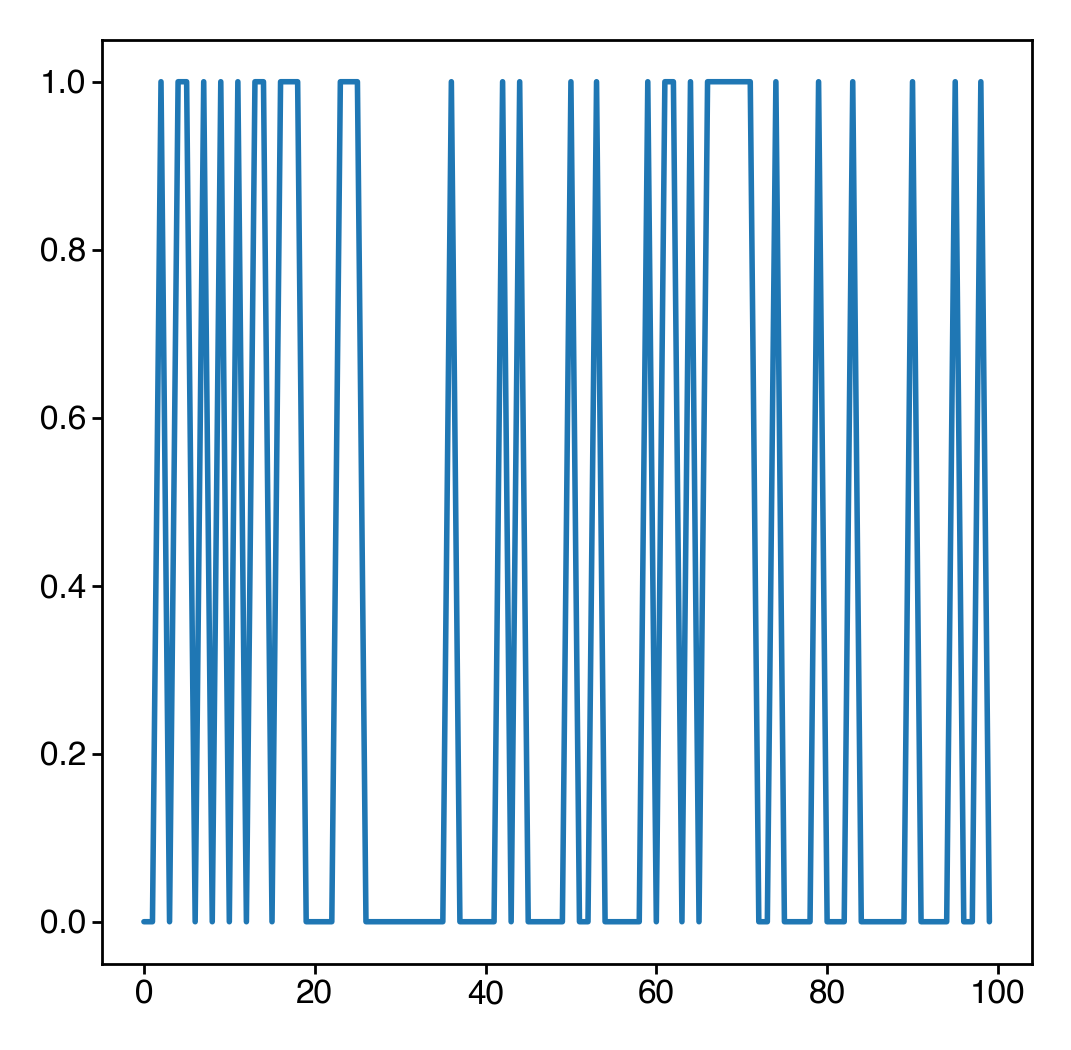

In [165]:
mask = np.zeros(100, dtype='bool')
mask[keep_syllables] = 1
plt.plot(mask)

In [166]:
rle_mtx = rle_counts.to_numpy()
rle_mtx[:, ~mask] = 0

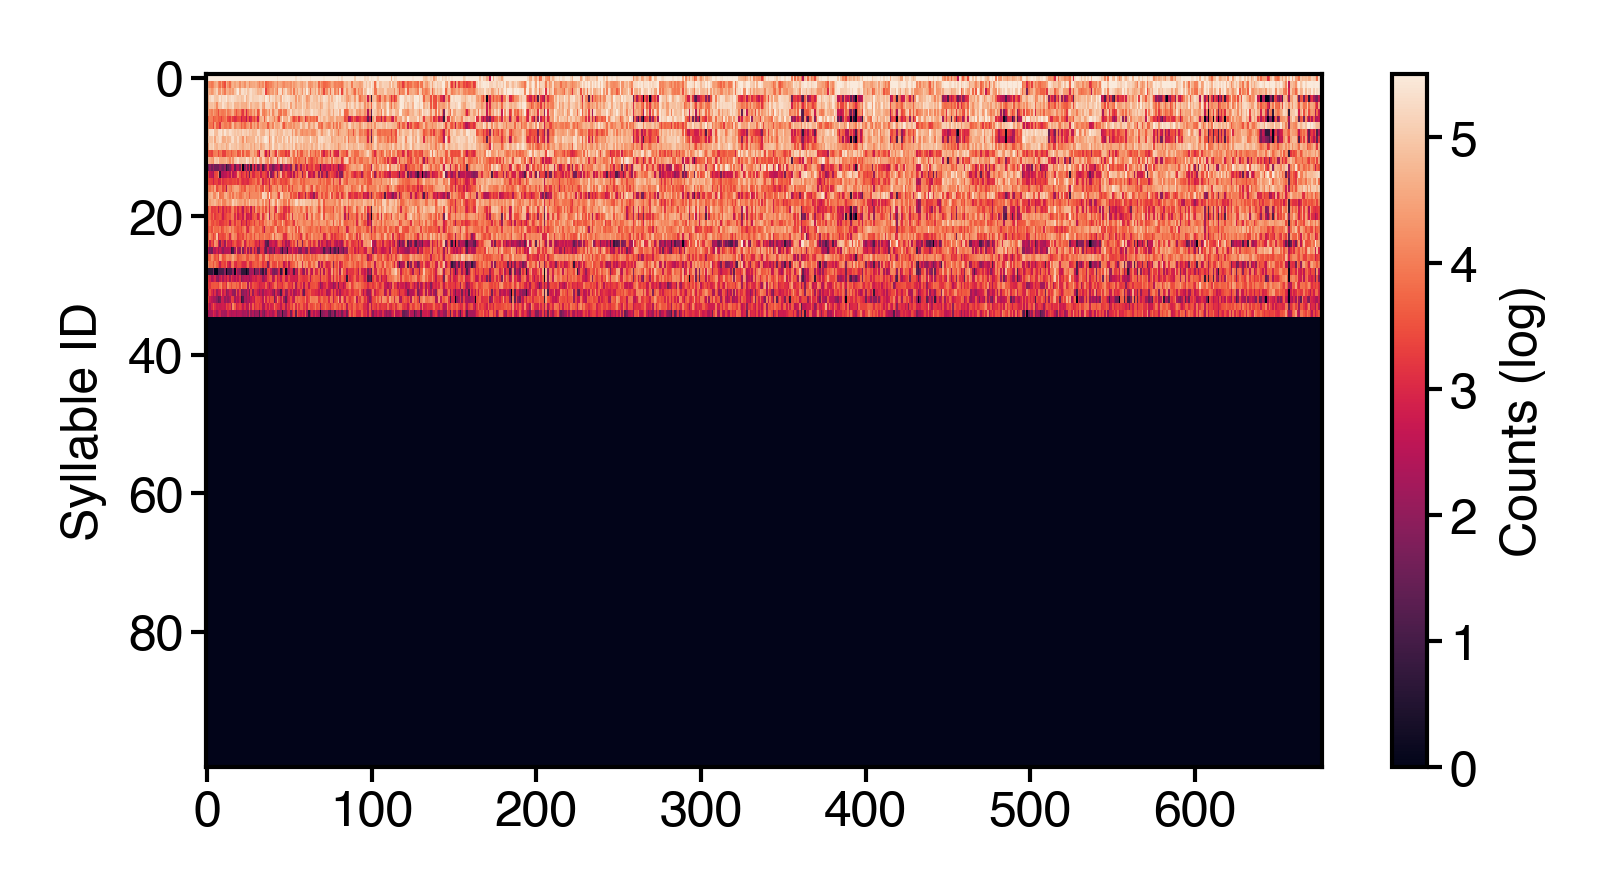

In [167]:
fig = figure(3, 1.5)
plt.imshow(np.log(rle_mtx[:, sorting].T + 1), aspect='auto', interpolation='none', vmax=5.5)
plt.ylabel('Syllable ID')
plt.colorbar(label='Counts (log)')

### 5%

In [168]:
keep_syllables = []
for age_window in sliding_window(3, ages):
    subset = rle_counts.loc[age_window[0]:age_window[-1]].sum()
    norm_subset = subset / subset.sum()
    sylls = norm_subset.index[norm_subset > 0.05]
    keep_syllables.extend(sylls)

In [169]:
keep_syllables = list(set(keep_syllables))
len(keep_syllables)

3

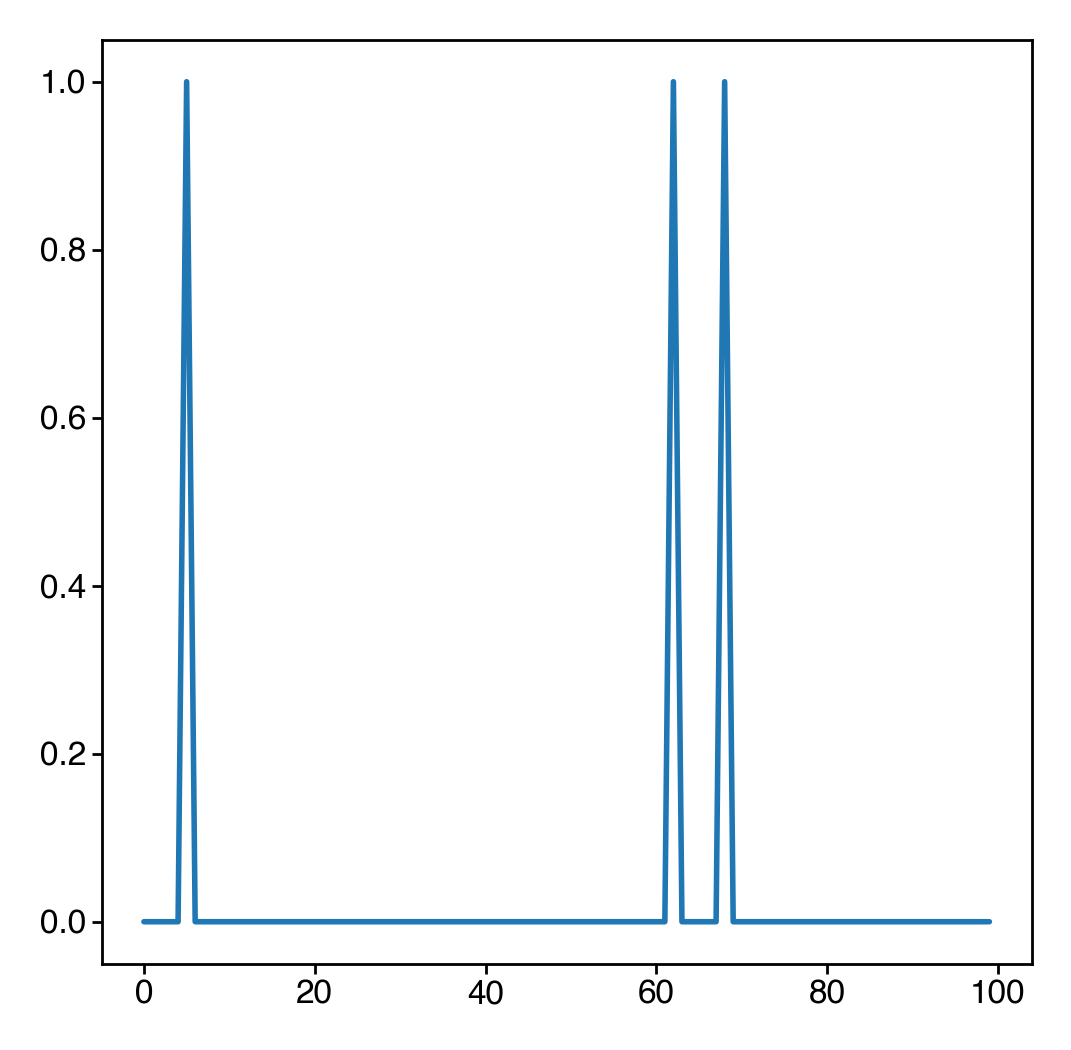

In [170]:
mask = np.zeros(100, dtype='bool')
mask[keep_syllables] = 1
plt.plot(mask)

In [171]:
rle_mtx = rle_counts.to_numpy()
rle_mtx[:, ~mask] = 0

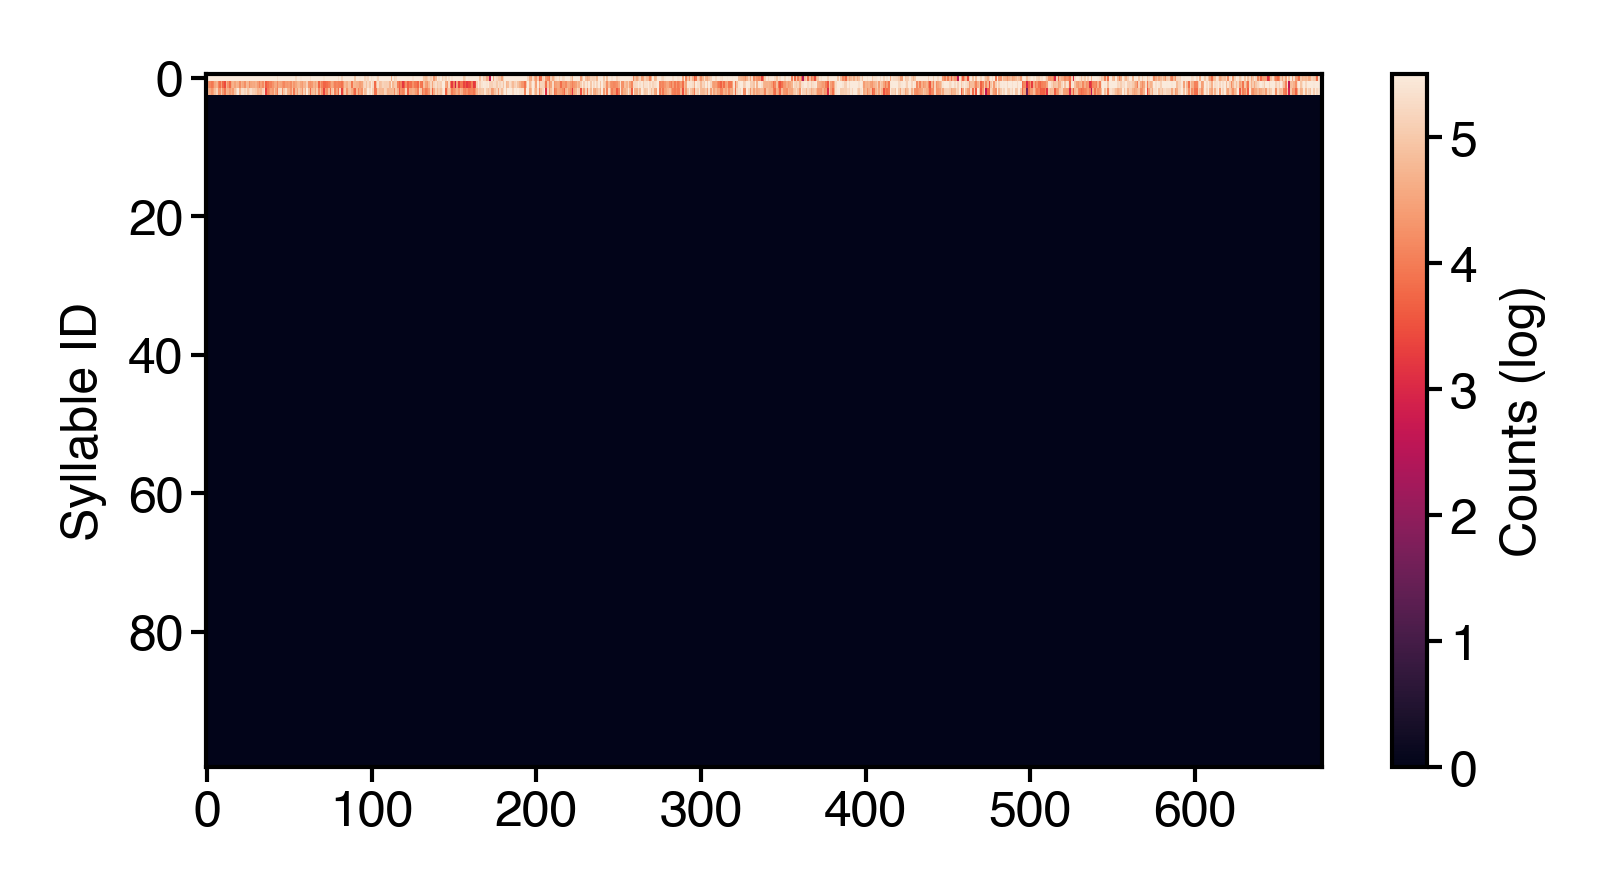

In [172]:
fig = figure(3, 1.5)
plt.imshow(np.log(rle_mtx[:, sorting].T + 1), aspect='auto', interpolation='none', vmax=5.5)
plt.ylabel('Syllable ID')
plt.colorbar(label='Counts (log)')

## Percent of frames threshold

In [16]:
keep_syllables = []
for age_window in sliding_window(3, ages):
    subset = frame_counts.loc[age_window[0]:age_window[-1]].sum()
    cumsum = subset.sort_values(ascending=False).cumsum() / subset.sum()
    sylls = cumsum.index[cumsum < 0.90]
    keep_syllables.extend(sylls)

In [17]:
keep_syllables = list(set(keep_syllables))
len(keep_syllables)

58

In [18]:
np.savetxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', keep_syllables, fmt=')

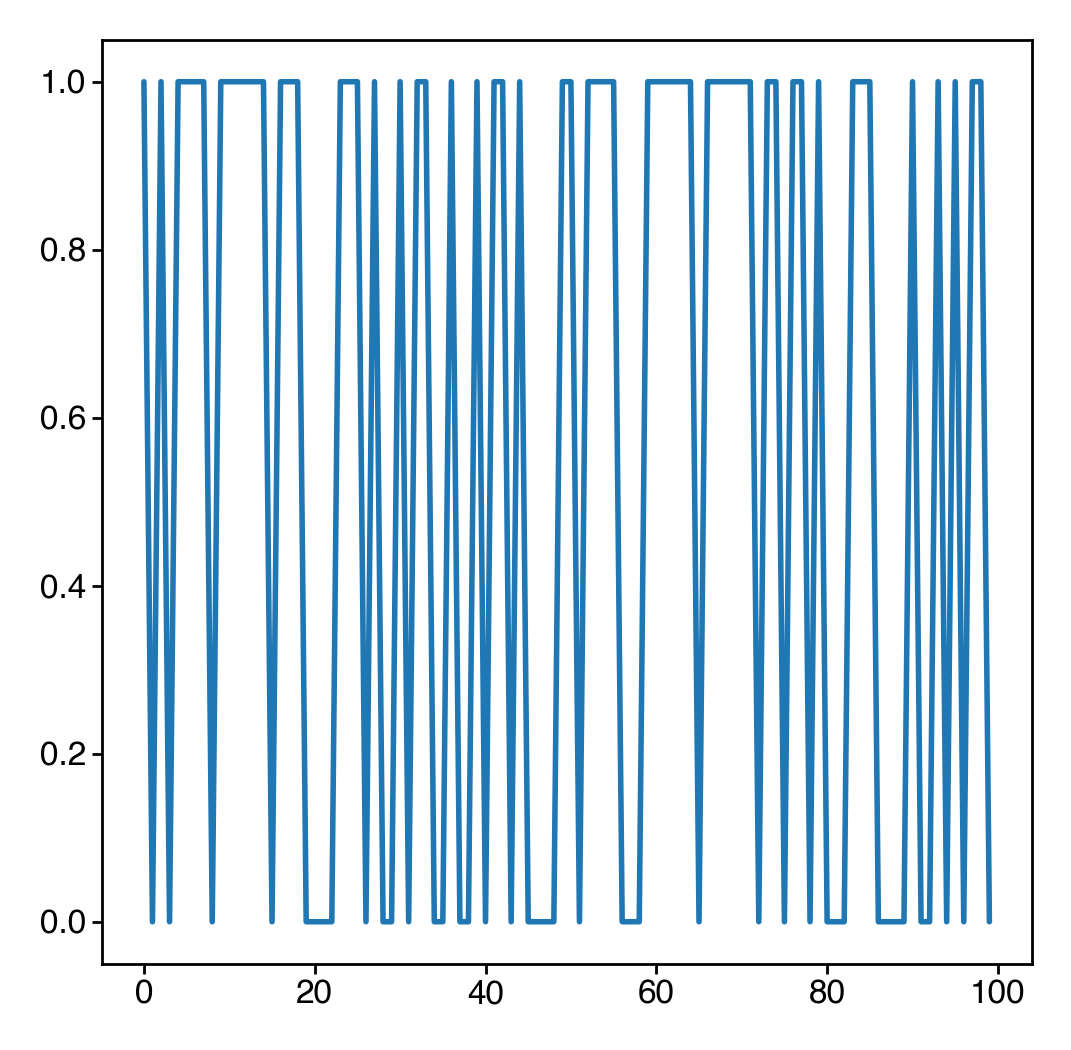

In [175]:
mask = np.zeros(100, dtype='bool')
mask[keep_syllables] = 1
plt.plot(mask)

In [176]:
rle_mtx = rle_counts.to_numpy()
rle_mtx[:, ~mask] = 0

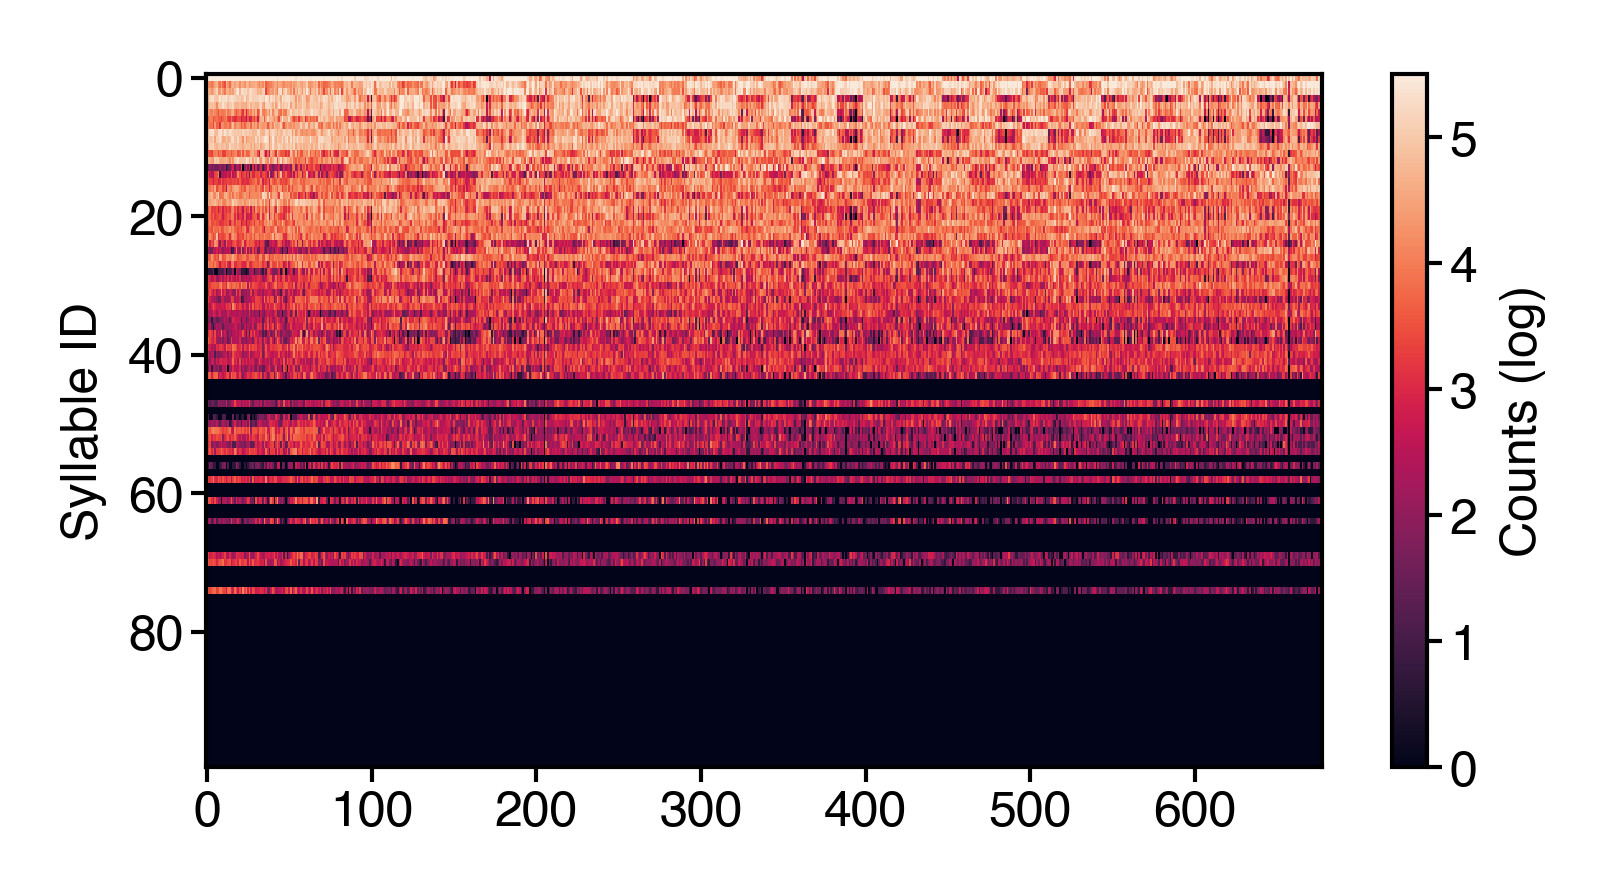

In [177]:
fig = figure(3, 1.5)
plt.imshow(np.log(rle_mtx[:, sorting].T + 1), aspect='auto', interpolation='none', vmax=5.5)
plt.ylabel('Syllable ID')
plt.colorbar(label='Counts (log)')

## Counts threshold

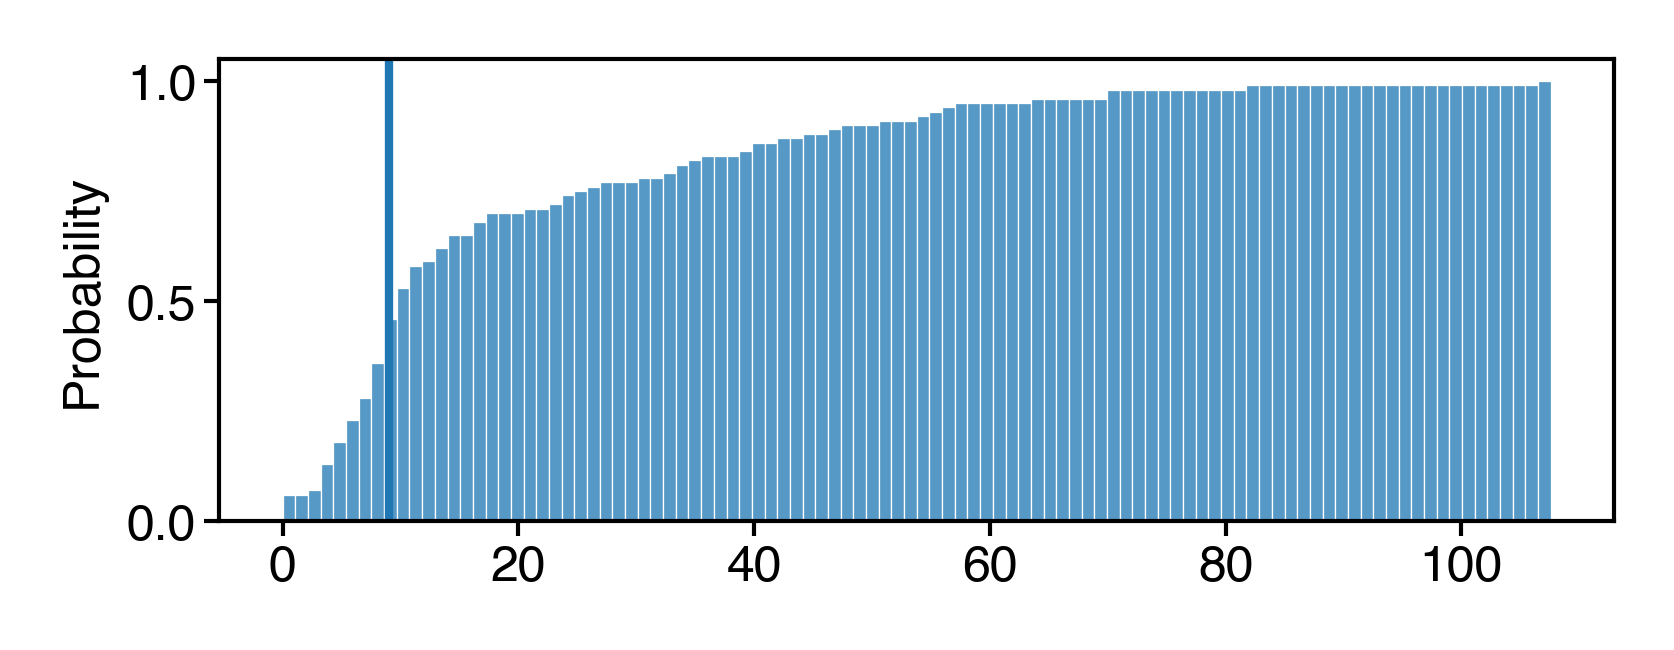

In [211]:
fig = figure(3, 1)
ax = sns.histplot(rle_counts.std(), bins=100, cumulative=True, stat='probability')
ax.axvline(9)

In [204]:
msk = (rle_counts.quantile(0.95) > 20) & (rle_counts.std() > 9)
keep_syllables = msk.index[msk]
len(keep_syllables)

61

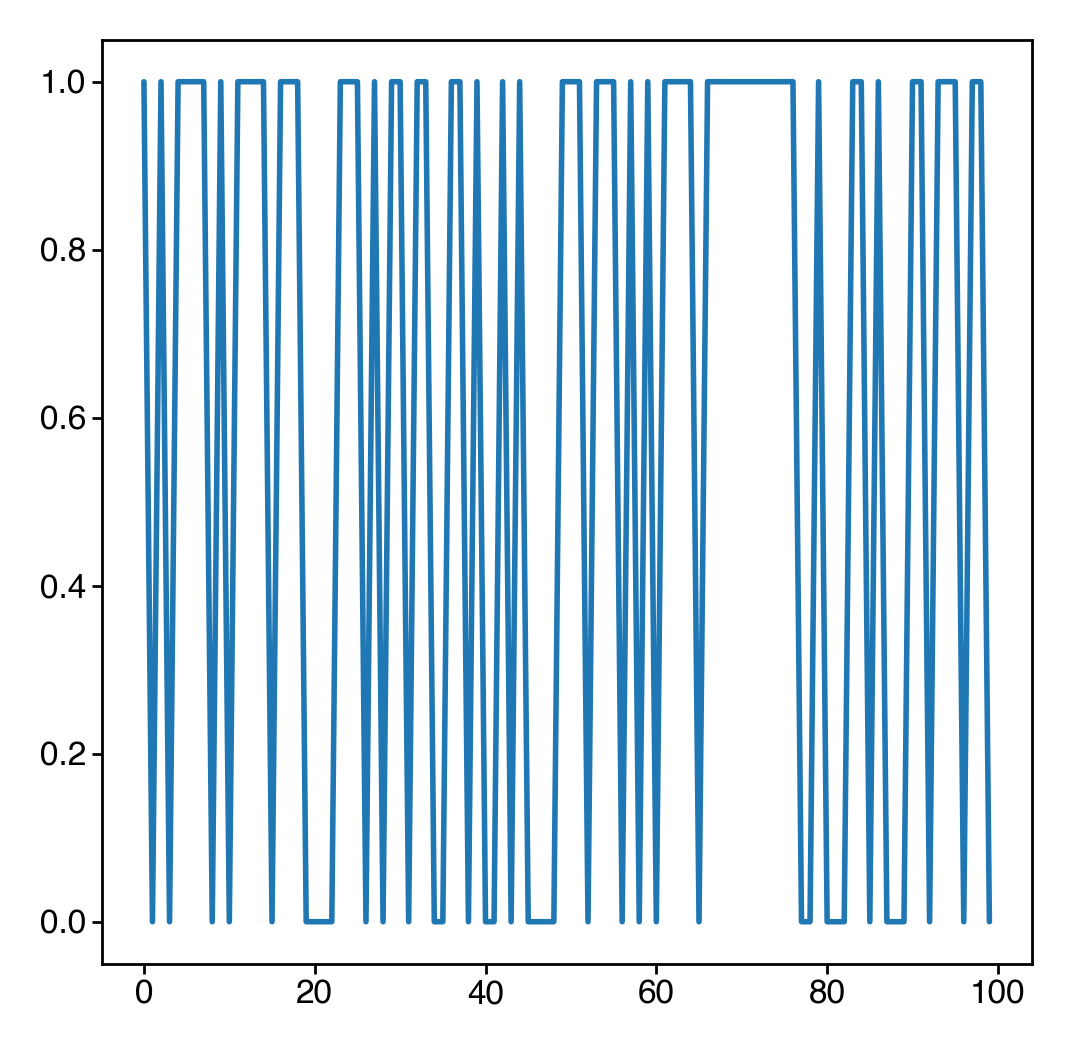

In [205]:
mask = np.zeros(100, dtype='bool')
mask[keep_syllables] = 1
plt.plot(mask)

In [206]:
rle_mtx = rle_counts.to_numpy()
rle_mtx[:, ~mask] = 0

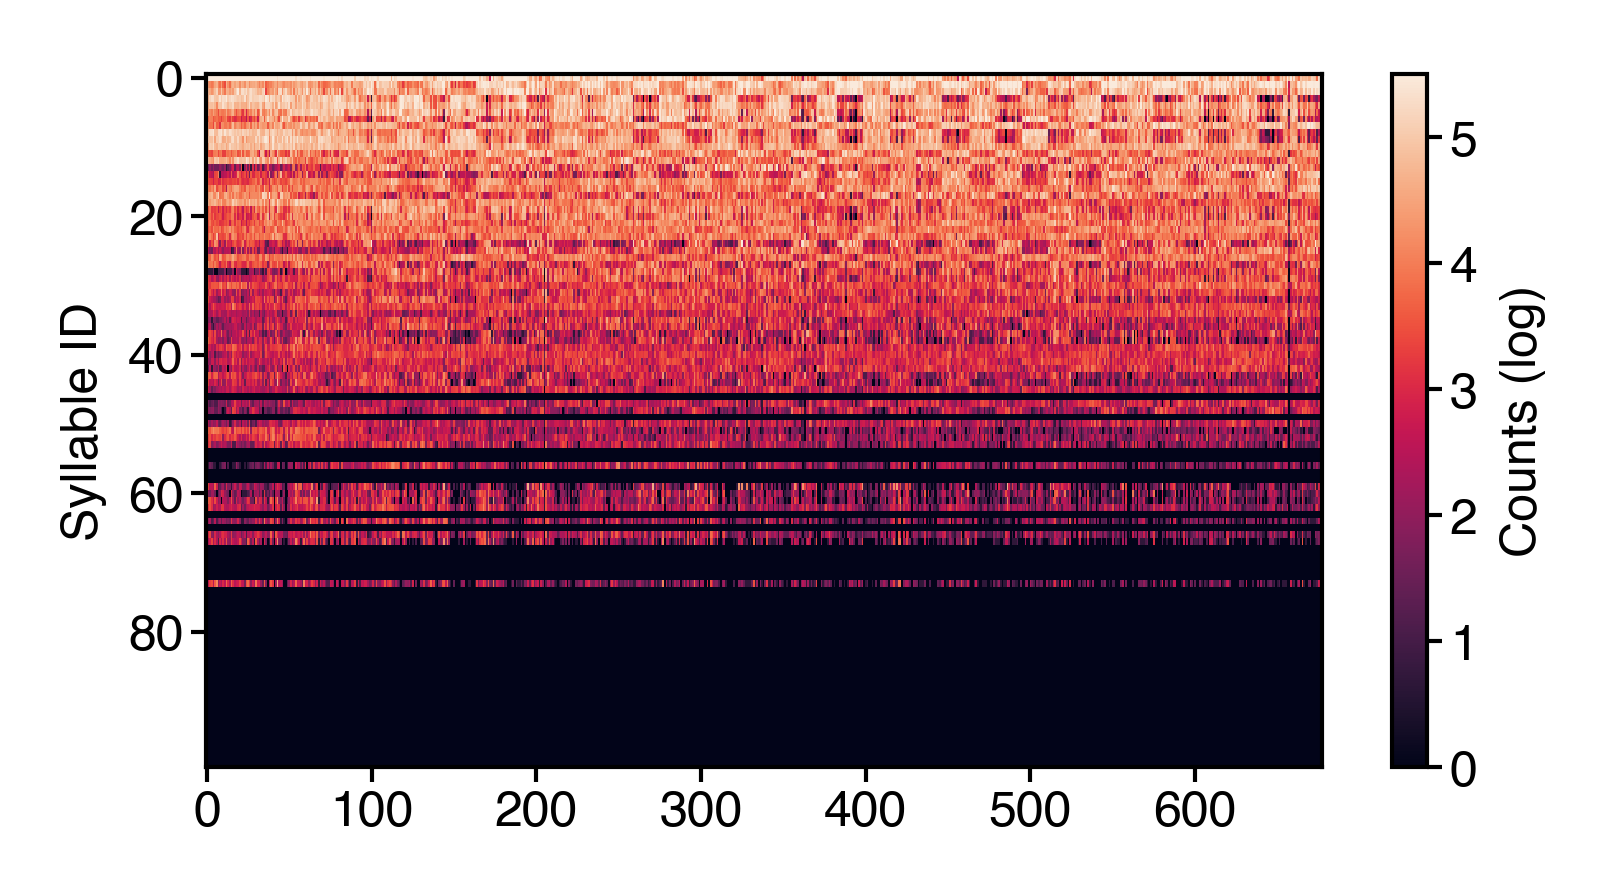

In [207]:
fig = figure(3, 1.5)
plt.imshow(np.log(rle_mtx[:, sorting].T + 1), aspect='auto', interpolation='none', vmax=5.5)
plt.ylabel('Syllable ID')
plt.colorbar(label='Counts (log)')